In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [3]:
# Load Dataset

epl_df = pd.read_csv("C:\\Users\\Ravi\\Desktop\\EPL_20_21.csv")
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
# Getting information about dataset.

epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [5]:
# Getting idea about basic statistics of dataset.

epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [6]:
# Finding all null values in dataset.

epl_df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [7]:
# Creating new columns

epl_df['MinsPerMatch']= (epl_df['Mins']/epl_df['Matches']).astype(int)
epl_df['GoalsPerMatch']= (epl_df['Goals']/epl_df['Matches']).astype(float)

In [8]:
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [9]:
# Total number of goals scored in 21-22 season.

Total_Goals= epl_df['Goals'].sum()
Total_Goals

986

In [10]:
# Total number of Penalty goals scored in 21-22 season.

Total_PenaltyGoals = epl_df['Penalty_Goals'].sum()
Total_PenaltyGoals

102

In [11]:
# Total number of Penalty attempts scored in 21-22 season.

Total_PenaltyAttempts = epl_df['Penalty_Attempted'].sum()
Total_PenaltyAttempts

125

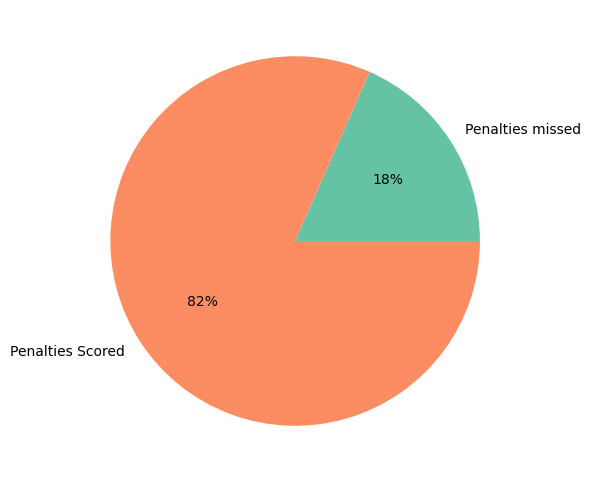

In [12]:
# Creating a pie chart for penalties missed vs scored.

plt.figure(figsize=(13,6))
pl_not_scored = epl_df['Penalty_Attempted'].sum()- Total_PenaltyGoals
data= [pl_not_scored,Total_PenaltyGoals ]
labels = ['Penalties missed', 'Penalties Scored']
color = sns.color_palette('Set2')
plt.pie(data,labels = labels,colors = color, autopct = '%.0f%%')
plt.show()

In [13]:
# Finding total number of unique Positions.

epl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [30]:
# Finding Total number of forward players.

epl_df[epl_df['Position']=='FW']


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [33]:
# Finding the nationality of players.

Unique_nationality = epl_df['Nationality'].unique()
Unique_nationality 

array(['ENG', 'SEN', 'GER', 'ESP', 'FRA', 'ITA', 'BRA', 'CRO', 'USA',
       'DEN', 'MAR', 'SCO', 'ARG', 'POR', 'BEL', 'ALG', 'UKR', 'NED',
       'SWE', 'URU', 'SRB', 'WAL', 'CIV', 'NGA', 'EGY', 'TUR', 'CMR',
       'GUI', 'SUI', 'JPN', 'IRL', 'GRE', 'NIR', 'GHA', 'AUT', 'JAM',
       'RSA', 'CZE', 'POL', 'PAR', 'COD', 'KOR', 'COL', 'GAB', 'NOR',
       'AUS', 'BIH', 'ISL', 'MKD', 'BFA', 'ZIM', 'SVK', 'MEX', 'CAN',
       'MLI', 'IRN', 'NZL', 'MTN', 'SKN'], dtype=object)

In [45]:
# Finding count of players nationality.

nationalities_series = pd.Series(Unique_nationality)
nationalities_series.count()

59

In [50]:
# Find the nationality with the maximum number of players.

nationality = epl_df.groupby('Nationality').size().sort_values(ascending = False)
nationality.head(10)

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
POR     21
SCO     20
NED     16
WAL     12
BEL     11
dtype: int64

Text(0, 0.5, 'No of players')

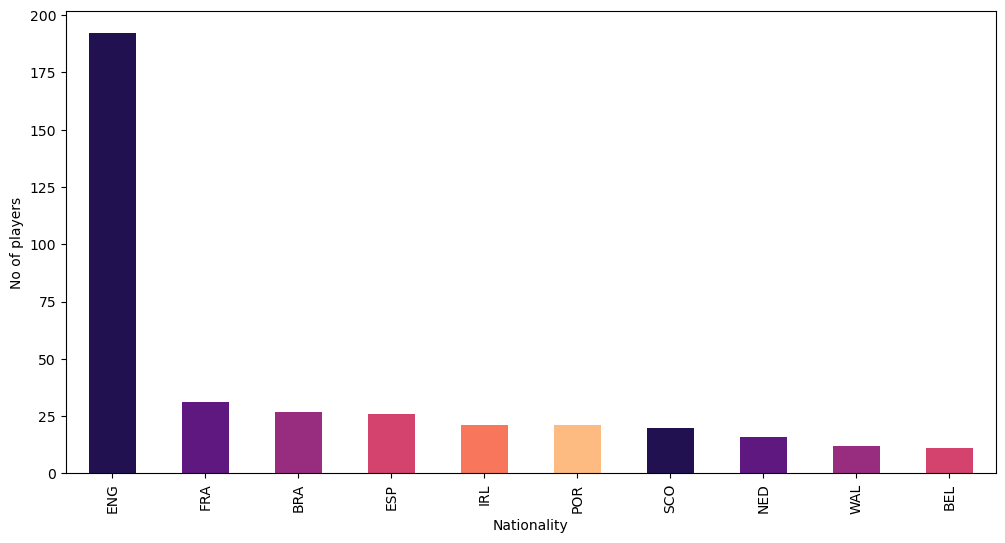

In [58]:
# Creating a bar plot for the nationality with the maximum number of players.

nationality.head(10).plot(kind= 'bar', color = sns.color_palette("magma"),figsize=(12,6))
plt.ylabel('No of players')

In [66]:
# Finding the clubs with most number of players in there squards.

epl_df['Club'].value_counts().nlargest(5)

Club
West Bromwich Albion    30
Manchester United       29
Arsenal                 29
Southampton             29
Everton                 29
Name: count, dtype: int64

In [67]:
# Finding the clubs with least  number of players in there squards.

epl_df['Club'].value_counts().nsmallest(5)

Club
Leeds United         23
Manchester City      24
Crystal Palace       24
Tottenham Hotspur    24
West Ham United      24
Name: count, dtype: int64

In [69]:
# Finding the players based on age groups.

Under20 = epl_df[epl_df['Age']<=20]
age20_25 = epl_df[(epl_df['Age']>20) & (epl_df['Age']<=25)]
age25_30 = epl_df[(epl_df['Age']>25) & (epl_df['Age']<=30)]
above_30 = epl_df[(epl_df['Age']>30)]

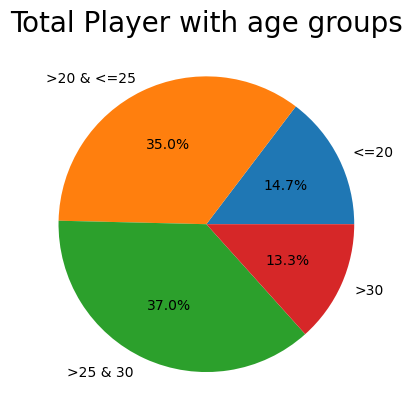

In [74]:
# Creating pie chart for the players based on age groups.

x= np.array([Under20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),above_30['Name'].count()])
mylabels = ["<=20",">20 & <=25",">25 & 30 ", ">30"]
plt.title('Total Player with age groups', fontsize = 20)
plt.pie(x, labels = mylabels, autopct = "%.1f%%")
plt.show()

In [78]:
# Finding youngsters in each club.

players_under_20 = epl_df[epl_df['Age'] <20 ]
players_under_20['Club'].value_counts()


Club
Manchester United          7
Wolverhampton Wanderers    5
Sheffield United           4
Southampton                4
Aston Villa                3
Liverpool FC               3
Leicester City             3
Brighton                   2
Chelsea                    2
Manchester City            2
Arsenal                    2
Everton                    2
Newcastle United           1
Leeds United               1
Tottenham Hotspur          1
Burnley                    1
Fulham                     1
Name: count, dtype: int64

In [79]:
# Finding senior players in each club.

players_above_30 = epl_df[epl_df['Age'] >30 ]
players_above_30['Club'].value_counts()



Club
West Bromwich Albion       7
Leicester City             6
Burnley                    6
West Ham United            5
Crystal Palace             5
Sheffield United           4
Manchester United          4
Wolverhampton Wanderers    4
Newcastle United           3
Southampton                3
Chelsea                    3
Manchester City            3
Leeds United               3
Arsenal                    3
Tottenham Hotspur          3
Everton                    2
Fulham                     2
Liverpool FC               2
Aston Villa                2
Brighton                   1
Name: count, dtype: int64

In [80]:
# Finding youngsters in man-utd.

players_under_20[players_under_20['Club']=='Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


In [81]:
# Finding youngsters in chelsea.

players_under_20[players_under_20['Club']=='Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


In [85]:
# Finding senior players in liverpool.

players_above_30[players_above_30['Club']=='Liverpool FC']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
93,James Milner,Liverpool FC,ENG,"MF,DF",34,26,11,1070,0,1,913,84.9,0,0,0.04,0.1,3,0,41,0.0
101,Adrián,Liverpool FC,ESP,GK,33,3,3,270,0,0,99,76.8,0,0,0.00,0.0,0,0,90,0.0


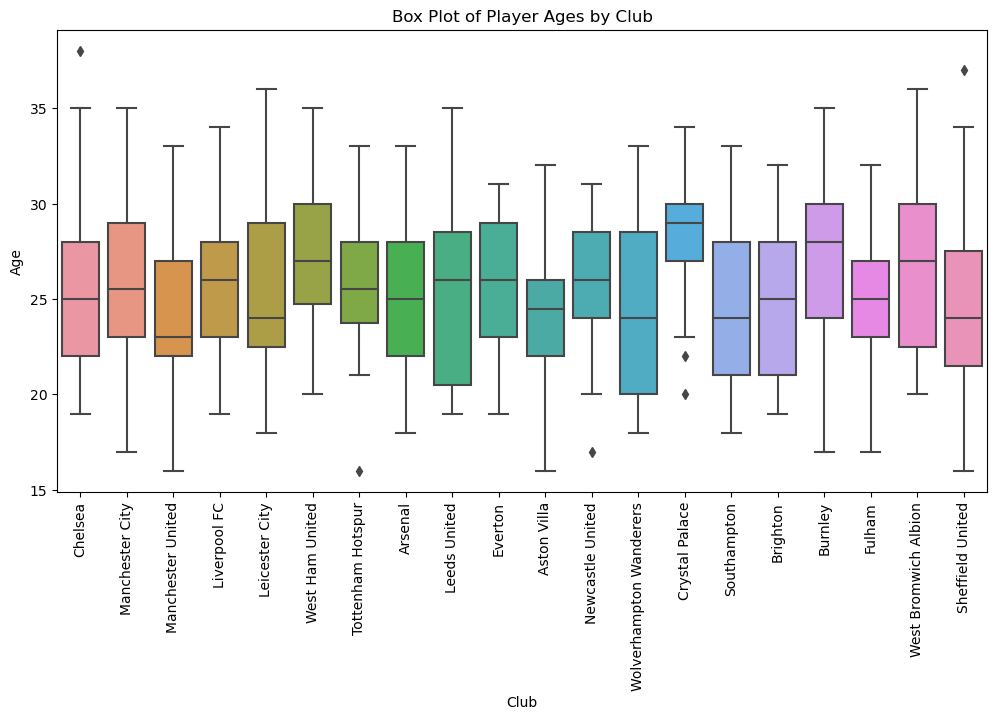

In [98]:
# Creating box plots to find average age of players in each club.

plt.figure(figsize=(12, 6))
sns.boxplot(x='Club', y='Age', data=epl_df)
plt.xticks(rotation=90)
plt.title('Box Plot of Player Ages by Club')
plt.xlabel('Club')
plt.ylabel('Age')
plt.show()

In [109]:
# Finding top 10 club with most number of assists.

Assists_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index = True)["Assists"].sum())
Assists_by_clubs_sorted = Assists_by_clubs.sort_values(by='Assists', ascending=False)
Assists_by_clubs_sorted.head(10)


,Assists
Club,
Manchester City,55
Manchester United,51
Tottenham Hotspur,50
West Ham United,46
Leeds United,45
Leicester City,45
Liverpool FC,43
Aston Villa,38
Arsenal,38


In [128]:
# Finding top 10 club with most number of goals.

Goals_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index = True)["Goals"].sum())
Goals_by_clubs_sorted = Goals_by_clubs.sort_values(by='Goals', ascending=False)
Goals_by_clubs_sorted.head(10)

,Goals
Club,
Manchester City,82
Manchester United,70
Tottenham Hotspur,66
Liverpool FC,65
Leicester City,64
Leeds United,60
West Ham United,60
Chelsea,56
Arsenal,53


In [138]:
# Finding top 10 players with most number of assists.

top_assists = epl_df[['Name','Assists','Matches']].nlargest(n=10, columns = 'Assists')
top_assists

,Name,Assists,Matches
162,Harry Kane,14,35
34,Kevin De Bruyne,12,25
51,Bruno Fernandes,12,37
161,Son Heung-min,10,37
273,Jack Grealish,10,26
54,Marcus Rashford,9,37
110,Jamie Vardy,9,34
220,Raphael Dias Belloli,9,30
2,Timo Werner,8,35
136,Aaron Cresswell,8,36


Text(0, 0.5, 'Total goals scored')

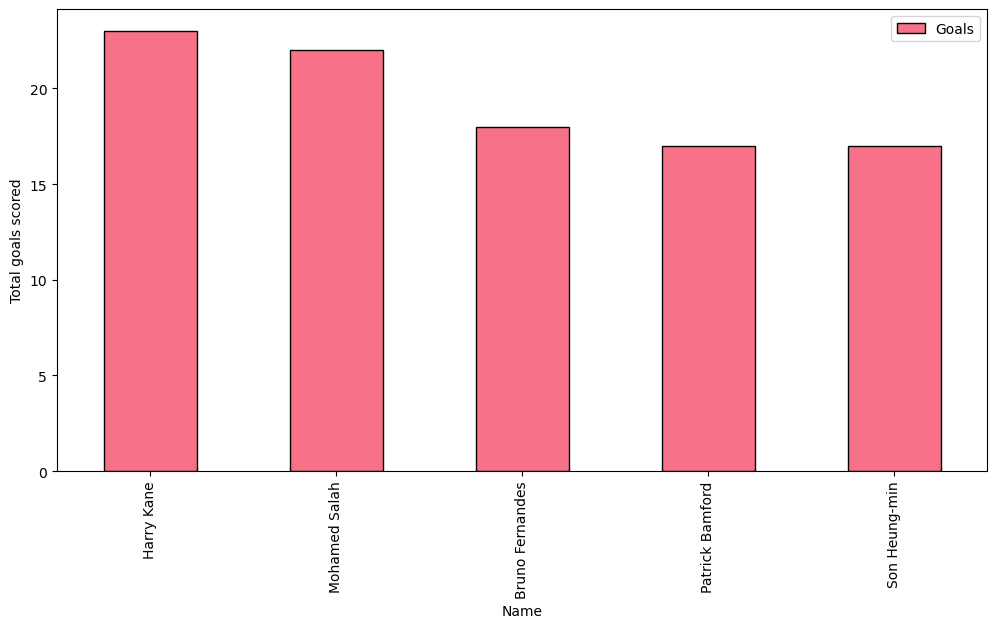

In [127]:
# Creating a bar chart showing top 5 players with most goal scored.

Goals_by_players = pd.DataFrame(epl_df.groupby('Name', as_index = True)["Goals"].sum())
Goals_by_players_sorted = Goals_by_players.sort_values(by='Goals', ascending=False)
Goals_by_players_sorted
Goals_by_players_sorted.head().plot(kind= 'bar',figsize=(12,6),edgecolor="black", color = sns.color_palette("husl"))
plt.ylabel('Total goals scored')

In [137]:
# Goals per match.

top_10_goals_per_match = epl_df[['Name','GoalsPerMatch','Matches','Goals']].nlargest(n=10, columns = 'GoalsPerMatch')
top_10_goals_per_match

,Name,GoalsPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


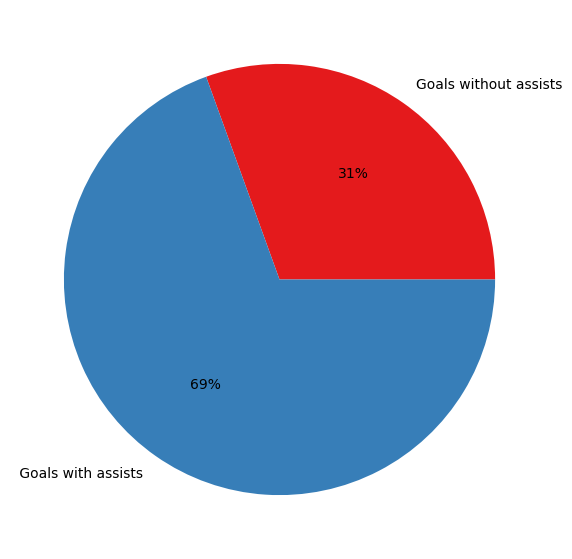

In [143]:
# Pie chart showing goals with assists and without assists.

plt.figure(figsize=(14,7))
assists = epl_df['Assists'].sum()
data = [Total_Goals - assists , assists]
labels = ['Goals without assists', ' Goals with assists']
color = sns.color_palette('Set1')
plt.pie(data, labels=labels, autopct="%.0f%%", colors=color)
plt.show()

In [149]:
# Top 10 players with most yellow cards.

epl_yellow = epl_df[['Name', 'Club', 'Nationality', 'Yellow_Cards']].sort_values(by='Yellow_Cards', ascending=False).head(10)
epl_yellow



,Name,Club,Nationality,Yellow_Cards
266,John McGinn,Aston Villa,SCO,12
53,Harry Maguire,Manchester United,ENG,11
480,Conor Gallagher,West Bromwich Albion,ENG,11
218,Kalvin Phillips,Leeds United,ENG,10
270,Douglas Luiz,Aston Villa,BRA,10
159,Pierre Højbjerg,Tottenham Hotspur,DEN,9
242,Mason Holgate,Everton,ENG,9
514,John Lundstram,Sheffield United,ENG,8
346,Luka Milivojević,Crystal Palace,SRB,8
318,Rúben Neves,Wolverhampton Wanderers,POR,8


In [152]:
# Top 10 players with most red cards.

epl_red = epl_df[['Name', 'Club', 'Nationality', 'Red_Cards']].sort_values(by='Red_Cards', ascending=False).head(10)
epl_red

,Name,Club,Nationality,Red_Cards
397,Lewis Dunk,Brighton,ENG,2
172,Matt Doherty,Tottenham Hotspur,IRL,1
509,John Egan,Sheffield United,IRL,1
477,Semi Ajayi,West Bromwich Albion,NGA,1
31,João Cancelo,Manchester City,POR,1
390,Alexandre Jankewitz,Southampton,SUI,1
300,Jeff Hendrick,Newcastle United,IRL,1
410,Tariq Lamptey,Brighton,ENG,1
373,Jannik Vestergaard,Southampton,DEN,1
38,John Stones,Manchester City,ENG,1
